In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import piplite
await piplite.install("seaborn")
import seaborn as sns

In [79]:
df = pd.read_csv("penguins.csv")
df.head(50)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [80]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [81]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

由于4个数值特征的缺失值都集中在2行,所以可将这两行直接删去;
当性别为NAN,将其视为独立类别“Unknown”

In [82]:
df = df.dropna(subset = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"])
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [83]:
df["sex"] = df["sex"].fillna("Unknown")
df.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [84]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


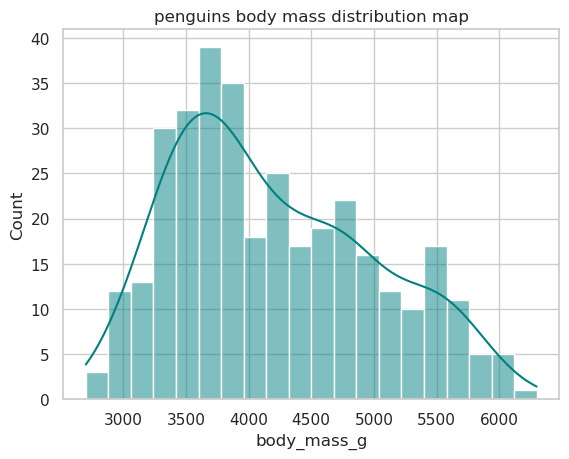

In [85]:
# 绘制直方图
sns.histplot(df["body_mass_g"], bins = 20, kde = True, color = "teal")
plt.title("penguins body mass distribution map")
plt.show()

In [86]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

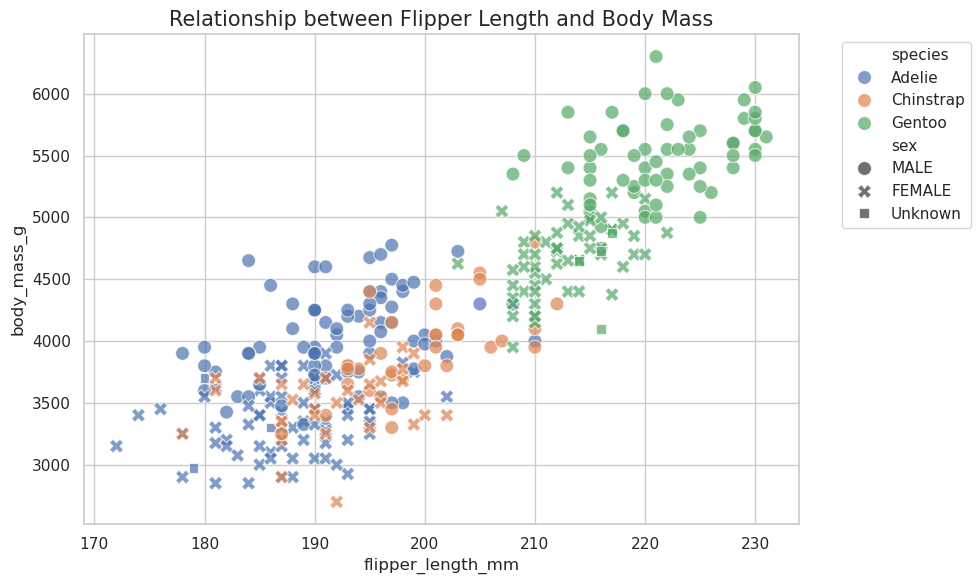

In [87]:
# 绘制散点图

sns.set_theme(style = "whitegrid")
plt.figure(figsize = (10,6))

sns.scatterplot(
    data = df,
    x = "flipper_length_mm", # 横轴
    y = "body_mass_g", # 纵轴
    hue = "species", # 不同颜色区分品种
    style = "sex", # 不同形状区分性别
    s = 100, # 设置点的大小
    alpha = 0.7 # 设置透明度
)

plt.title("Relationship between Flipper Length and Body Mass", fontsize = 15)
plt.xlabel("flipper_length_mm", fontsize = 12)
plt.ylabel("body_mass_g", fontsize = 12)

plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

In [88]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [89]:
df["island"].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

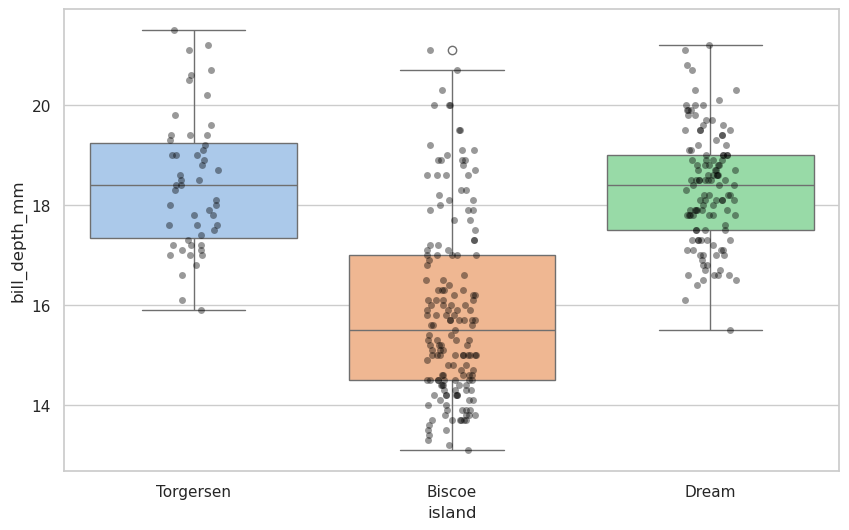

In [90]:
plt.figure(figsize = (10,6))

sns.boxplot(
    data = df,
    x = "island",
    y = "bill_depth_mm",
    hue = "island",
    palette = "pastel" # 给箱线图用浅色
)

sns.stripplot(
    data = df,
    x = "island",
    y = "bill_depth_mm",
    color = "black",
    alpha = 0.4, # 设置透明度
    jitter = True, # key: 开启抖动，使点不重合
    dodge = False, 
    legend = False
)

plt.show()

In [91]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


In [92]:
df["sex"].value_counts()

sex
MALE       168
FEMALE     165
Unknown      9
Name: count, dtype: int64

In [97]:
df.groupby("species")["sex"].value_counts()

species    sex    
Adelie     FEMALE     73
           MALE       73
           Unknown     5
Chinstrap  FEMALE     34
           MALE       34
Gentoo     MALE       61
           FEMALE     58
           Unknown     4
Name: count, dtype: int64

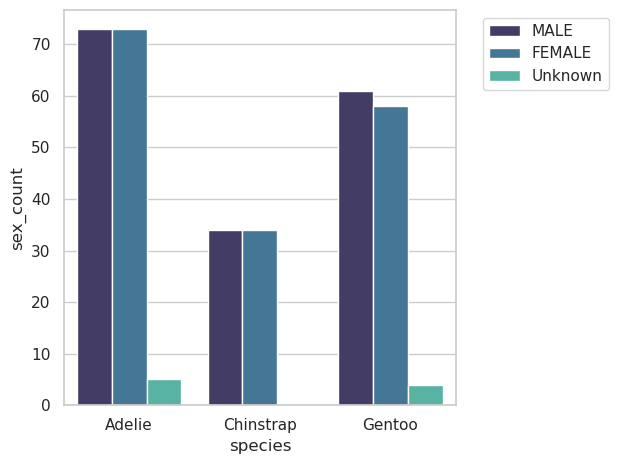

In [108]:
sns.countplot(
    data = df,
    x = "species",
    hue = "sex",
    palette = "mako" # 颜色过渡（热力图）
)

plt.ylabel("sex_count")
plt.legend(bbox_to_anchor = (1.05, 1), loc = "upper left")
plt.tight_layout()
plt.show()

In [109]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


<Axes: >

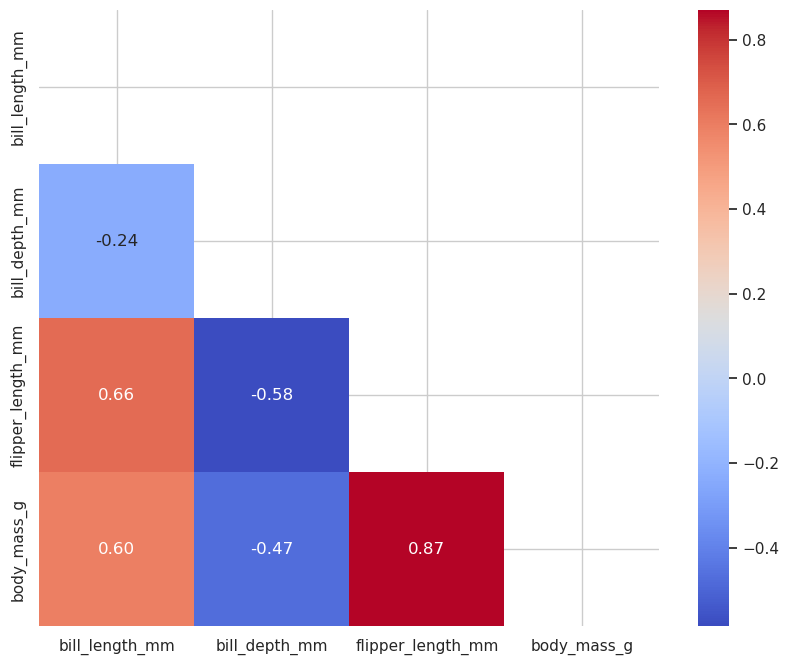

In [121]:
# 计算相关性
corr_matrix = df.select_dtypes(include = "number").corr()

# 创建一个和相关系数矩阵形状一样的掩码矩阵
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# 绘制热力图
plt.figure(figsize = (10, 8))
sns.heatmap(
    corr_matrix, # 关注绝对值
    mask = mask,
    annot = True, # 在方格内显示数字
    cmap = "coolwarm",
    fmt = ".2f"
    
)

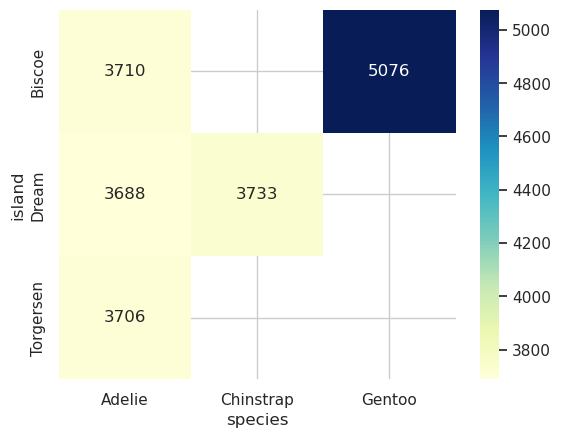

In [112]:
# 1. 先通过透视表将数据转化为矩阵
pivot_table = df.pivot_table(index='island', columns='species', values='body_mass_g', aggfunc='mean')

# 2. 绘制热力图
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt=".0f")
plt.show()